In [103]:
import numpy as np  # Importing NumPy library for numerical operations
import pandas as pd  # Importing Pandas library for data manipulation and analysis
import seaborn as sns  # Importing Seaborn library for data visualization
import matplotlib.pyplot as plt  # Importing Matplotlib library for creating plots

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

from sklearn.metrics import mean_squared_error, mean_absolute_error  # Importing evaluation metrics from scikit-learn library


import warnings  # Importing warnings module to handle warnings
warnings.filterwarnings("ignore")  # Ignore warnings during runtime

plt.style.use('ggplot')  # Setting the plot style to 'ggplot'

In [104]:
df = pd.read_csv('daily-website-visitors.csv')  # Reading the CSV file into a DataFrame
# Convert 'Date' column to datetime format and set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

# Select specific columns from the DataFrame
df = df[['Day', 'Day.Of.Week', 'Page.Loads']]

# Display the DataFrame
print(df.head())

                  Day  Day.Of.Week Page.Loads
Date                                         
2014-09-14     Sunday            1      2,146
2014-09-15     Monday            2      3,621
2014-09-16    Tuesday            3      3,698
2014-09-17  Wednesday            4      3,667
2014-09-18   Thursday            5      3,316


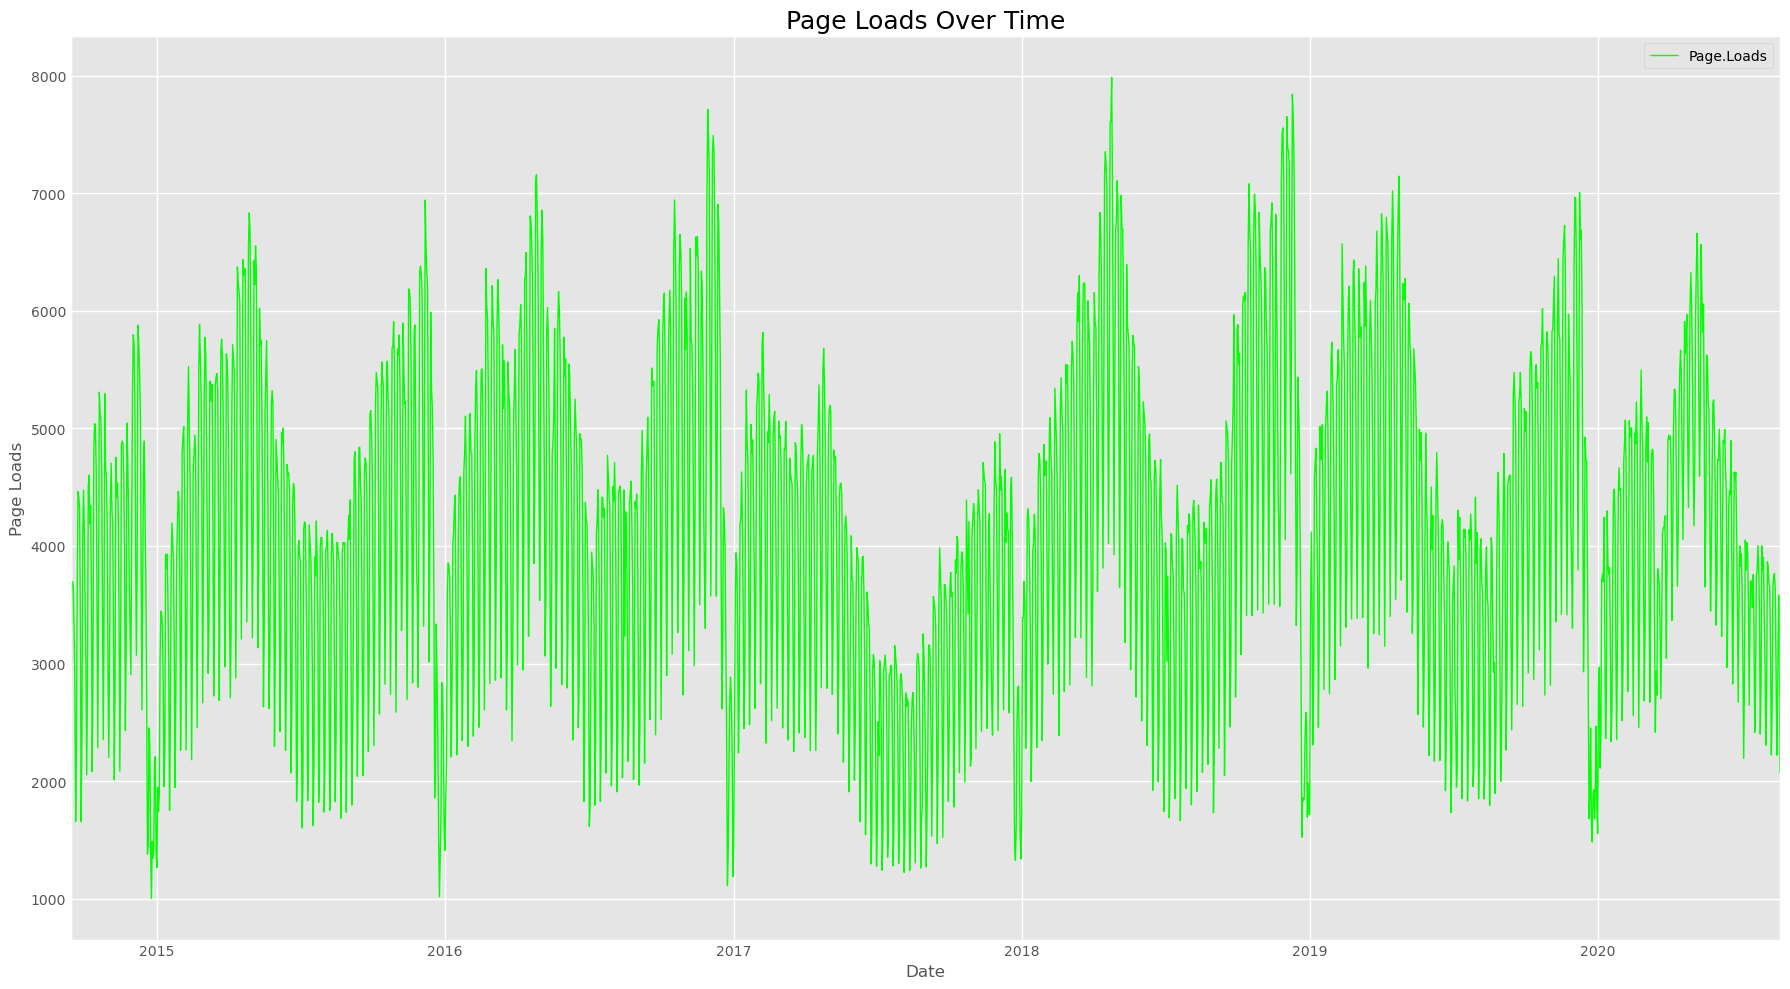

In [105]:
# Remove commas from the 'Page.Loads' column and convert it to numeric
df['Page.Loads'] = df['Page.Loads'].str.replace(',', '').astype(int)

# Create a new figure and axis object for the plot
fig, ax = plt.subplots(figsize=(18, 10))

# Plot 'Page Loads' over time
df.plot(y='Page.Loads', ax=ax, color="lime", linestyle="-", linewidth=1, markersize=8)

# Set the title of the plot
ax.set_title("Page Loads Over Time", fontsize=18)

# Set the label for the x-axis
ax.set_xlabel("Date", fontsize=12)

# Set the label for the y-axis
ax.set_ylabel("Page Loads", fontsize=12)

# Adjust the layout of the plot to prevent overlap of axis labels
fig.tight_layout()

# Display the plot
plt.show()

# Train and test split of the data

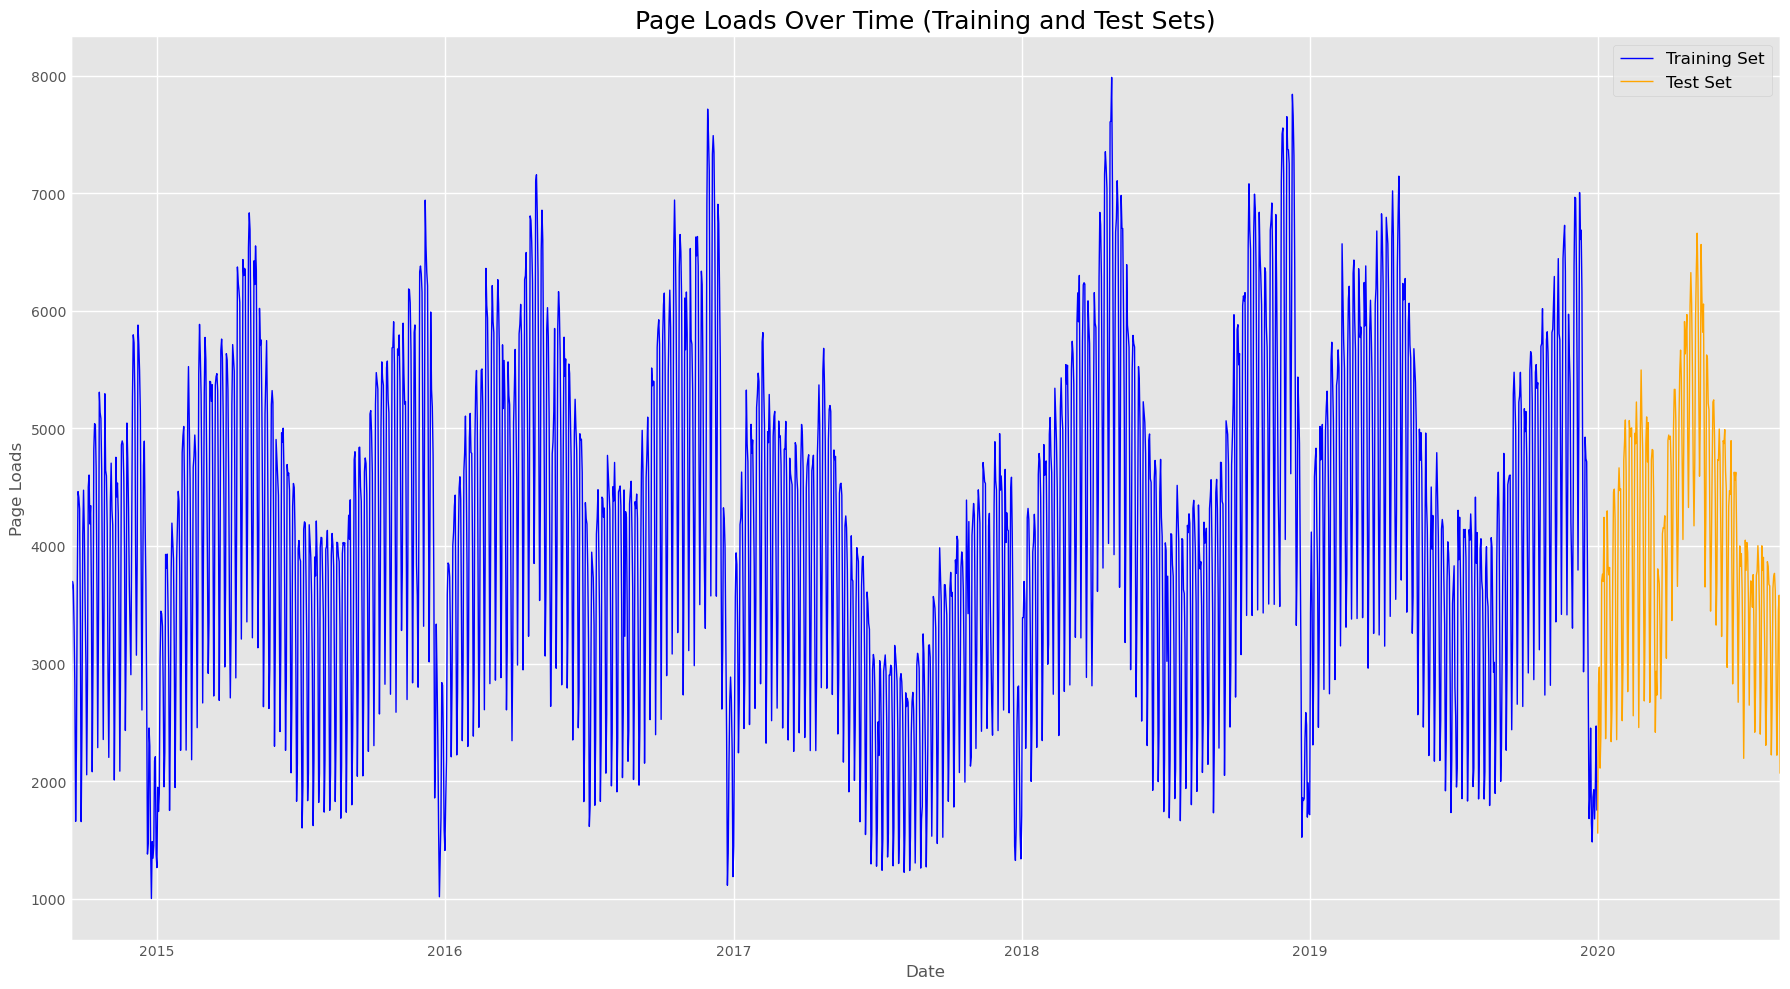

In [106]:
# Split the data into training and test sets
split_date = '2020-01-01'
train = df.loc[df.index < split_date].copy()
test = df.loc[df.index >= split_date].copy()

# Create a new figure and axis object for the plot
fig, ax = plt.subplots(figsize=(18, 10))

# Plot 'Page Loads' over time for training and test sets
train.plot(y='Page.Loads', ax=ax, color="blue", linestyle="-", linewidth=1, markersize=8, label='Training Set')
test.plot(y='Page.Loads', ax=ax, color="orange", linestyle="-", linewidth=1, markersize=8, label='Test Set')

# Set the title of the plot
ax.set_title("Page Loads Over Time (Training and Test Sets)", fontsize=18)

# Set the label for the x-axis
ax.set_xlabel("Date", fontsize=12)

# Set the label for the y-axis
ax.set_ylabel("Page Loads", fontsize=12)

# Add a legend to the plot
plt.legend(fontsize=12)

# Adjust the layout of the plot to prevent overlap of axis labels
fig.tight_layout()

# Display the plot
plt.show()


# Feature Creation 

In [107]:
def create_features(df):
    """
    Create time series features based on DataFrame columns.
    """
    df = df.copy()
    # Extract features based on 'Date' index
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    
    return df

# Assuming your DataFrame is named 'selected_columns'
df_with_features = create_features(df)

# Visualize features 

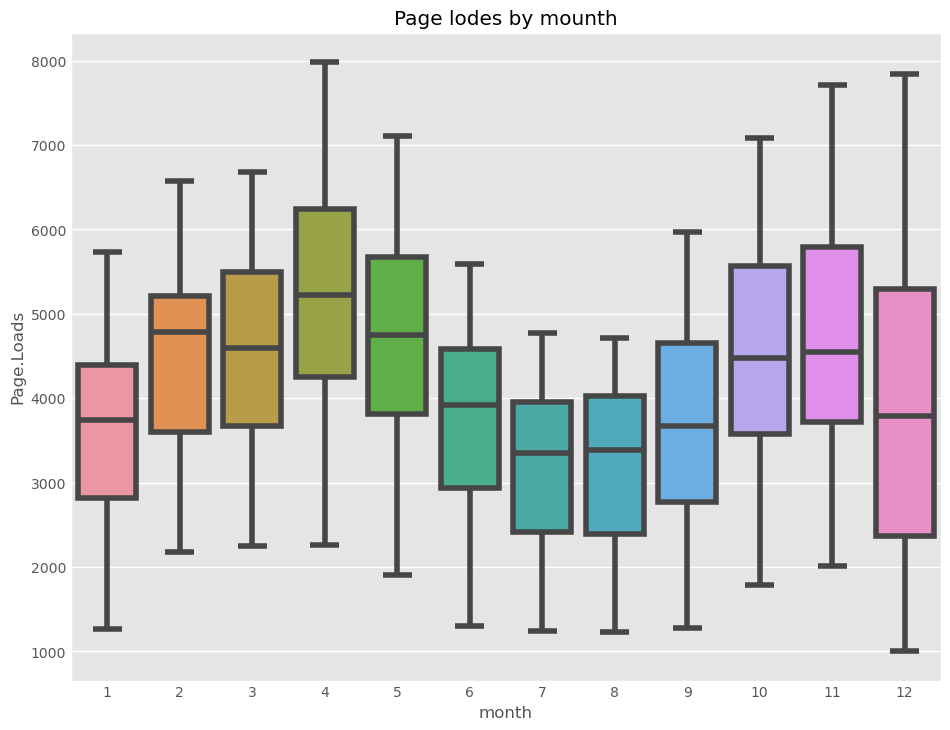

In [108]:
# Assuming your DataFrame is named 'df_with_features'
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df_with_features, x='month', y='Page.Loads')
ax.set_title('Page lodes by mounth')
plt.show()

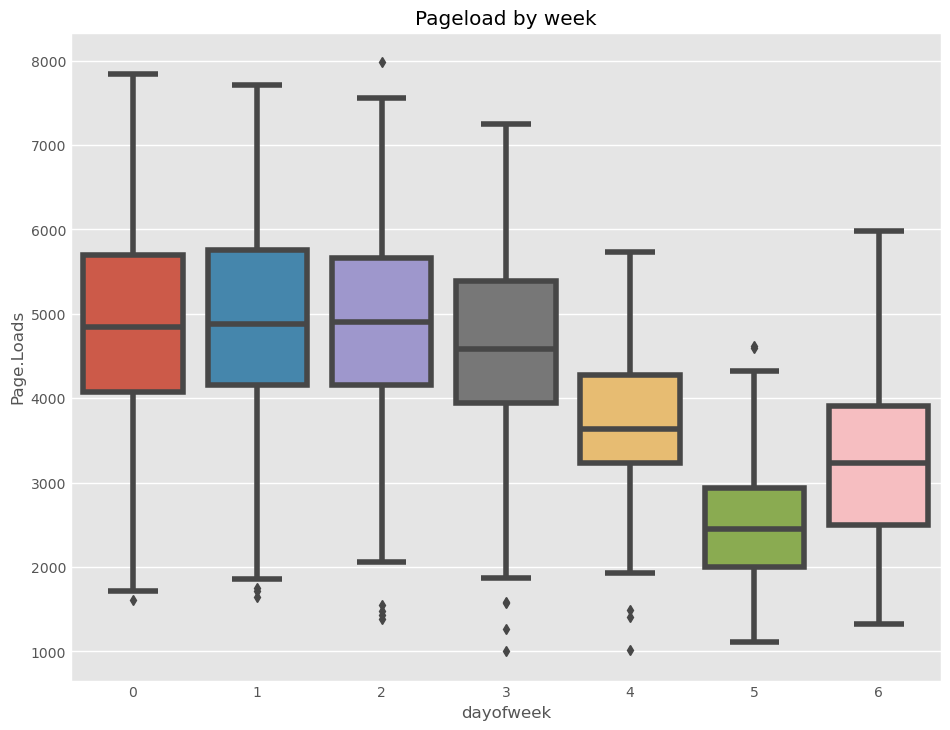

In [109]:
# Assuming your DataFrame is named 'df_with_features'
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df_with_features, x='dayofweek', y='Page.Loads')
ax.set_title('Pageload by week')
plt.show()

# Model implementation 

In [110]:
print(train)


                  Day  Day.Of.Week  Page.Loads
Date                                          
2014-09-14     Sunday            1        2146
2014-09-15     Monday            2        3621
2014-09-16    Tuesday            3        3698
2014-09-17  Wednesday            4        3667
2014-09-18   Thursday            5        3316
...               ...          ...         ...
2019-12-27     Friday            6        1927
2019-12-28   Saturday            7        1679
2019-12-29     Sunday            1        1962
2019-12-30     Monday            2        2469
2019-12-31    Tuesday            3        1750

[1935 rows x 3 columns]


In [111]:
# Proceed with creating features
train = create_features(train)
test = create_features(test)

# Define features and target
# FEATURES = ['dayofyear', 'dayofweek', 'quarter', 'month', 'year', 'dayofmonth', 'weekofyear']
FEATURES = [ 'dayofweek', 'quarter', 'month', 'dayofmonth']

TARGET = 'Page.Loads'

# Extract features and target variables
X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [112]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:4305.97129	validation_1-rmse:4163.57467
[100]	validation_0-rmse:1783.83860	validation_1-rmse:1592.12734
[200]	validation_0-rmse:999.00161	validation_1-rmse:815.95265
[300]	validation_0-rmse:782.60000	validation_1-rmse:663.40150
[400]	validation_0-rmse:702.20393	validation_1-rmse:638.91649
[500]	validation_0-rmse:665.09773	validation_1-rmse:629.31120
[600]	validation_0-rmse:648.49237	validation_1-rmse:627.49026
[700]	validation_0-rmse:637.15699	validation_1-rmse:626.24666
[800]	validation_0-rmse:629.68775	validation_1-rmse:624.35410
[900]	validation_0-rmse:623.07886	validation_1-rmse:622.35452
[981]	validation_0-rmse:619.03775	validation_1-rmse:622.65845


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

# Feature Importance

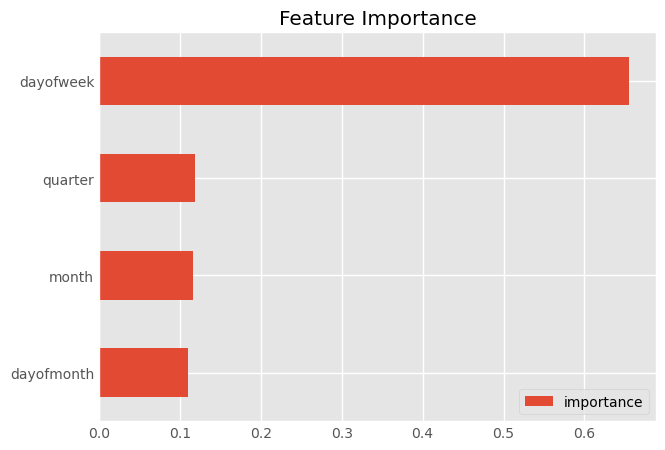

In [113]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

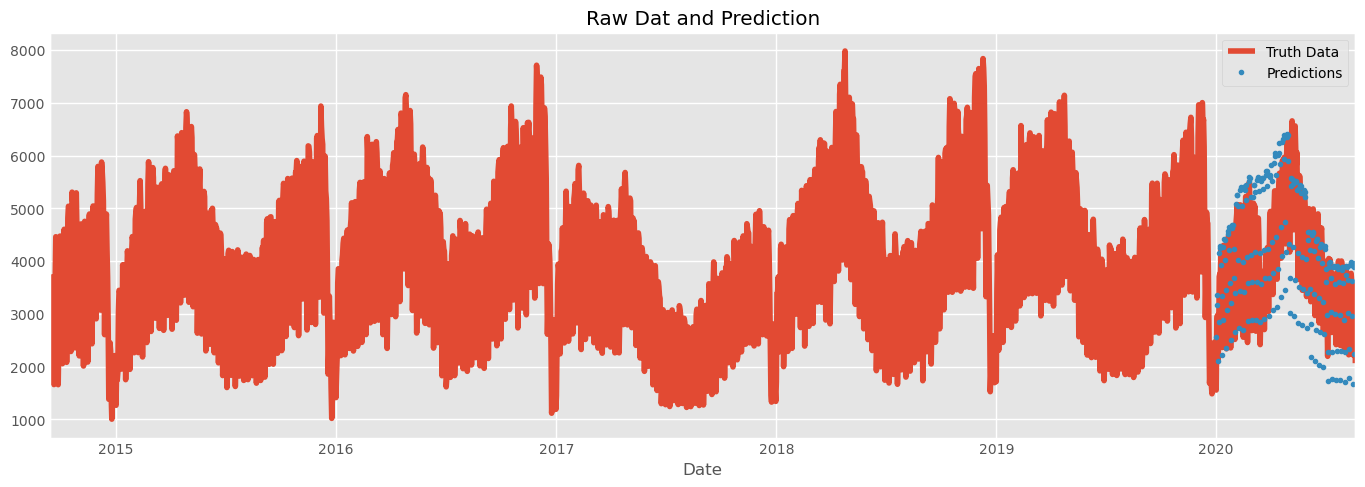

In [114]:
test['prediction'] = reg.predict(X_test)
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = df[['Page.Loads']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

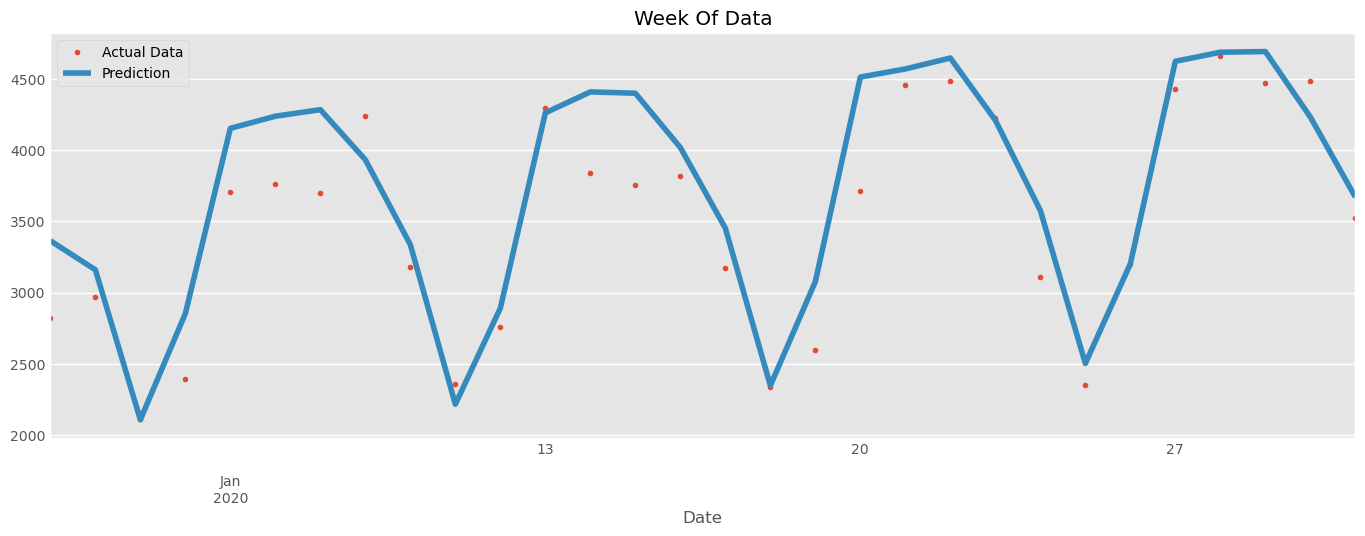

In [115]:
ax = df.loc[(df.index > '2020-01-01') & (df.index < '2020-02-01')]['Page.Loads'] \
    .plot(figsize=(15, 5), title='Week Of Data', style='.')
df.loc[(df.index > '2020-01-01') & (df.index < '2020-02-01')]['prediction'] \
    .plot(style='-')
plt.legend(['Actual Data','Prediction'])
plt.show()

In [116]:
# Filter the DataFrame for the specified period
period_data = df.loc[(df.index > '2020-01-01') & (df.index < '2020-02-01')]

# Extract the actual values and predictions for the specified period
actual_values = period_data['Page.Loads']
predictions = period_data['prediction']

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(actual_values, predictions)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_values, predictions)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((actual_values - predictions) / actual_values)) * 100

# Print the results
print("Mean Squared Error (MSE):", np.sqrt(mse))
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Squared Error (MSE): 349.35541168828337
Mean Absolute Error (MAE): 274.16388346354165
Mean Absolute Percentage Error (MAPE): 8.13059040889254


# Forecasting with one year of data  


In [117]:
# Specify the split dates
split_date2 = '2020-01-01'
test_end_date2 = '2020-03-01'

# Split the data into training and test sets
train2 = df.loc[(df.index >= '2019-01-01') & (df.index < split_date2)].copy()
test2 = df.loc[(df.index >= split_date2) & (df.index < test_end_date2)].copy()

# Proceed with creating features
train2 = create_features(train2)
test2 = create_features(test2)

# Define features and target
FEATURES2 = ['dayofweek', 'quarter', 'month', 'dayofmonth']
TARGET2 = 'Page.Loads'

# Extract features and target variables
X_train2 = train2[FEATURES2]
y_train2 = train2[TARGET2]

X_test2 = test2[FEATURES2]
y_test2 = test2[TARGET2]

reg2 = xgb.XGBRegressor(
    n_estimators=1000,  # Number of boosting rounds
    early_stopping_rounds=50,  # Stop if no improvement in 50 rounds
    max_depth=5,  # Maximum depth of each tree
    learning_rate=0.1,  # Step size shrinkage
    objective='reg:squarederror'  # Regression task
)
reg2.fit(X_train2, y_train2,
        eval_set=[(X_train2, y_train2), (X_test2, y_test2)],
        verbose=100)

[0]	validation_0-rmse:1243.32361	validation_1-rmse:1052.21409
[62]	validation_0-rmse:179.24136	validation_1-rmse:833.77275


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

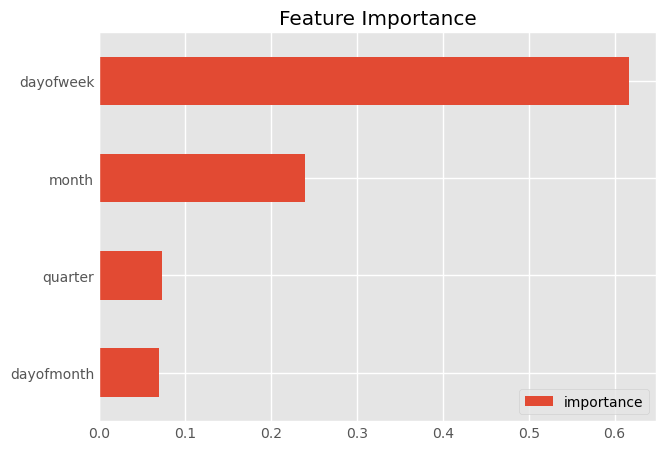

In [118]:
fi2 = pd.DataFrame(data=reg2.feature_importances_,
             index=reg2.feature_names_in_,
             columns=['importance'])
fi2.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

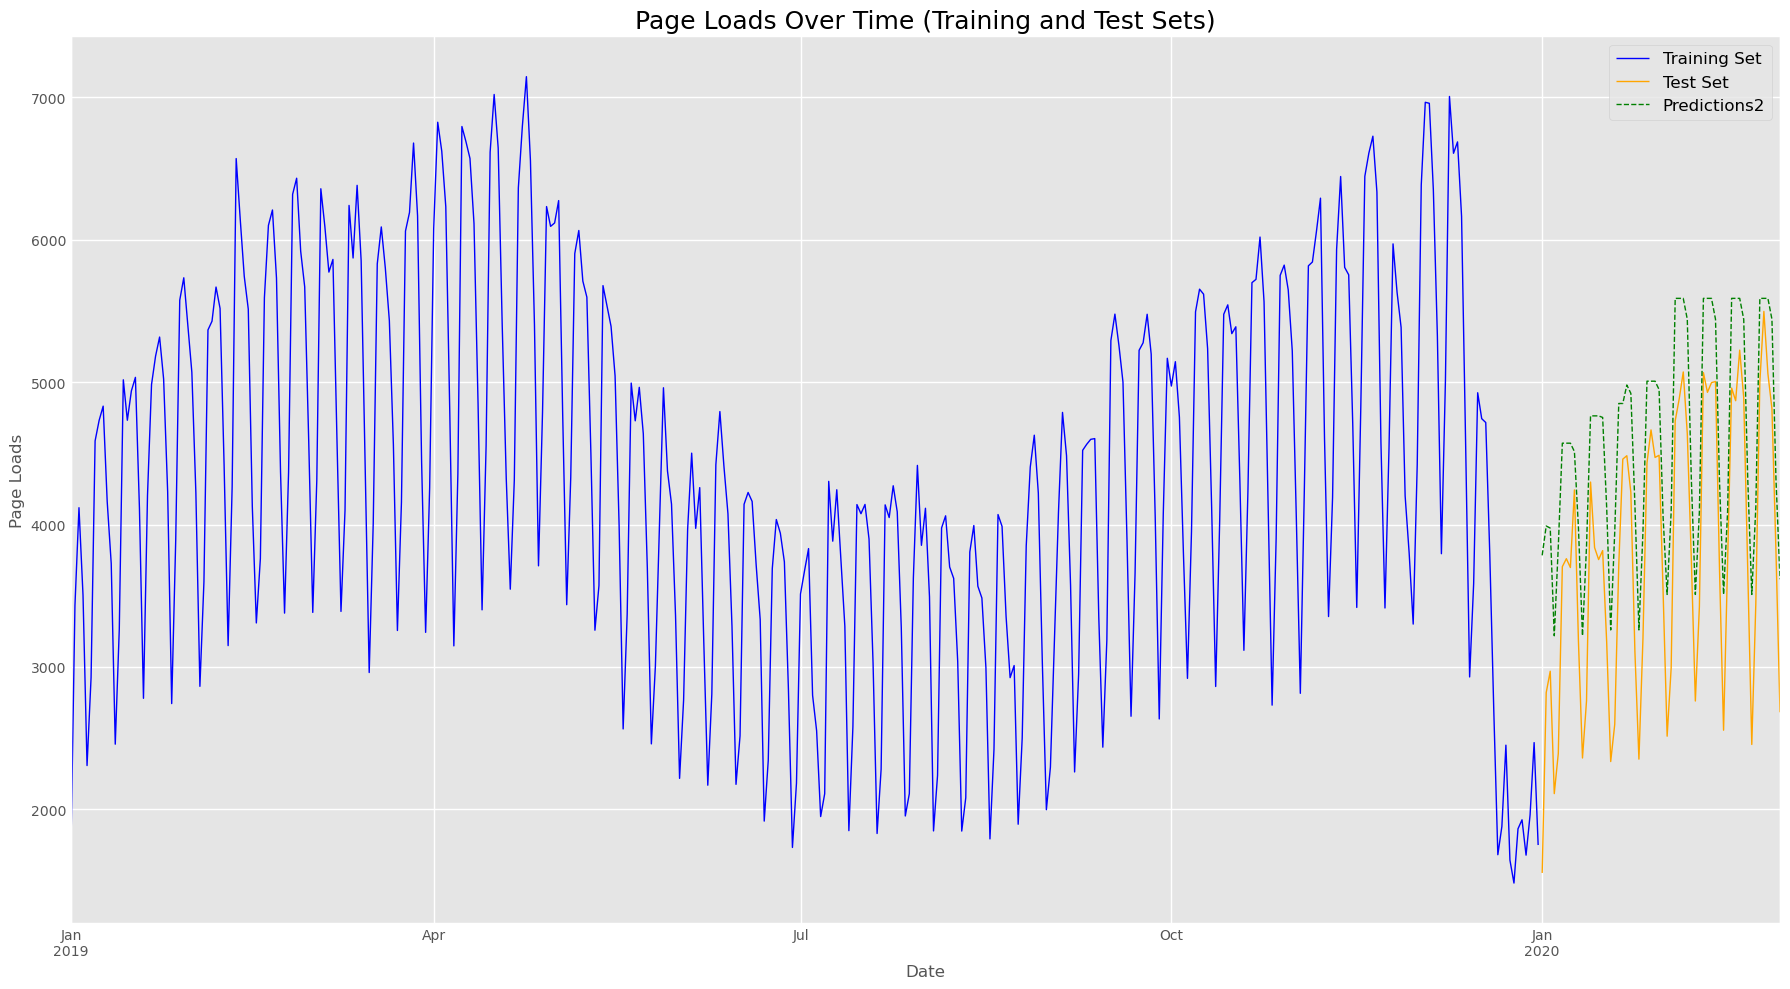

In [119]:
# Predict the future
predictions2 = reg2.predict(X_test2)

# Add predictions to the test set for plotting
test2['Predictions2'] = predictions2

# Create a new faigure and axis object for the plot
fig, ax = plt.subplots(figsize=(18, 10))

# Plot 'Page Loads' over time for training and test sets
train2.plot(y='Page.Loads', ax=ax, color="blue", linestyle="-", linewidth=1, label='Training Set')
test2.plot(y='Page.Loads', ax=ax, color="orange", linestyle="-", linewidth=1, label='Test Set')
test2.plot(y='Predictions2', ax=ax, color="green", linestyle="--", linewidth=1, label='Predictions2')

# Set the title of the plot
ax.set_title("Page Loads Over Time (Training and Test Sets)", fontsize=18)

# Set the label for the x-axis
ax.set_xlabel("Date", fontsize=12)

# Set the label for the y-axis
ax.set_ylabel("Page Loads", fontsize=12)

# Add a legend to the plot
plt.legend(fontsize=12)

# Adjust the layout of the plot to prevent overlap of axis labels
fig.tight_layout()

# Display the plot
plt.show()


In [120]:
# Filter the DataFrame for the specified period
period_data2 = test2.loc[(test2.index >= split_date2) & (test2.index < test_end_date2)]

# Extract the actual values and predictions for the specified period
actual_values2 = period_data2[TARGET2]
predictions2 = period_data2['Predictions2']

# Calculate Mean Squared Error (MSE)
mse2 = mean_squared_error(actual_values2, predictions2)

# Calculate Mean Absolute Error (MAE)
mae2 = mean_absolute_error(actual_values2, predictions2)

# Calculate Mean Absolute Percentage Error (MAPE)
mape2 = np.mean(np.abs((actual_values2 - predictions2) / actual_values2)) * 100

# Print the results
print("Mean Squared Error (MSE):", np.sqrt(mse2))
print("Mean Absolute Error (MAE):", mae2)
print("Mean Absolute Percentage Error (MAPE):", mape2)

Mean Squared Error (MSE): 833.4482478059454
Mean Absolute Error (MAE): 765.549979654948
Mean Absolute Percentage Error (MAPE): 24.190787840498214


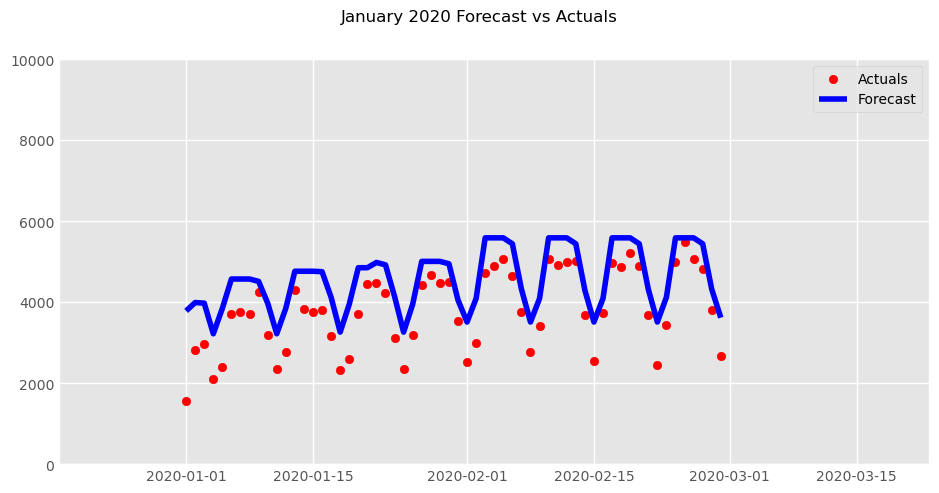

In [121]:

# Create a new figure and axis object for the plot
fig, ax = plt.subplots(figsize=(10, 5))

# Scatter plot of the actual values
ax.scatter(test2.index, test2['Page.Loads'], color='r', label='Actuals')

# Plot the forecast
ax.plot(test2.index, test2['Predictions2'], color='b', label='Forecast')

# Set x-axis limits for the specific month
ax.set_xlim(left=pd.Timestamp('2019-12-18'), right=pd.Timestamp('2020-03-23'))

# Set y-axis limits
ax.set_ylim(0, 10000)

# Set the title
plt.suptitle('January 2020 Forecast vs Actuals')

# Add a legend
plt.legend()

# Show the plot
plt.show()

# Forecasting with two year of data  


In [122]:
# Specify the split dates
split_date3 = '2020-01-01'
test_end_date3 = '2020-03-01'

# Split the data into training and test sets
train3 = df.loc[(df.index >= '2018-01-01') & (df.index < split_date3)].copy()
test3 = df.loc[(df.index >= split_date3) & (df.index < test_end_date3)].copy()

# Proceed with creating features
train3 = create_features(train3)
test3 = create_features(test3)

# Define features and target
FEATURES3 = ['dayofweek', 'quarter', 'month', 'dayofmonth']
TARGET3 = 'Page.Loads'

# Extract features and target variables
X_train3 = train3[FEATURES3]
y_train3 = train3[TARGET3]

X_test3 = test3[FEATURES3]
y_test3 = test3[TARGET3]

reg3 = xgb.XGBRegressor(
    n_estimators=1000,  # Number of boosting rounds
    early_stopping_rounds=50,  # Stop if no improvement in 50 rounds
    max_depth=5,  # Maximum depth of each tree
    learning_rate=0.1,  # Step size shrinkage
    objective='reg:squarederror'  # Regression task
)
reg3.fit(X_train3, y_train3,
         eval_set=[(X_train3, y_train3), (X_test3, y_test3)],
         verbose=100)

[0]	validation_0-rmse:1307.05304	validation_1-rmse:1081.01462
[100]	validation_0-rmse:300.75030	validation_1-rmse:550.24199
[168]	validation_0-rmse:263.28583	validation_1-rmse:555.73297


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

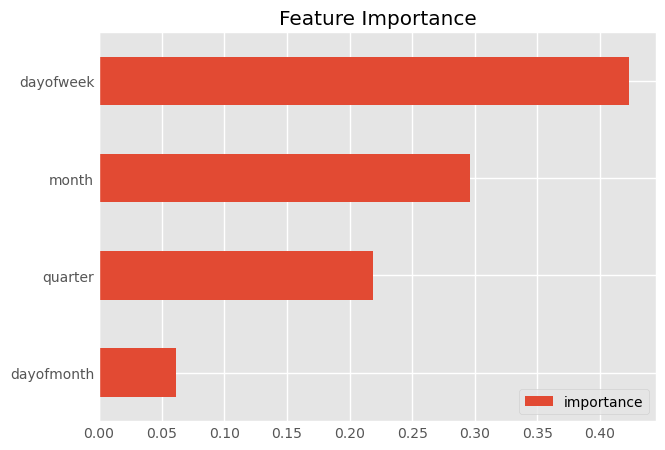

In [123]:
# Feature importance plot
fi3 = pd.DataFrame(data=reg3.feature_importances_,
                   index=reg3.feature_names_in_,
                   columns=['importance'])
fi3.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

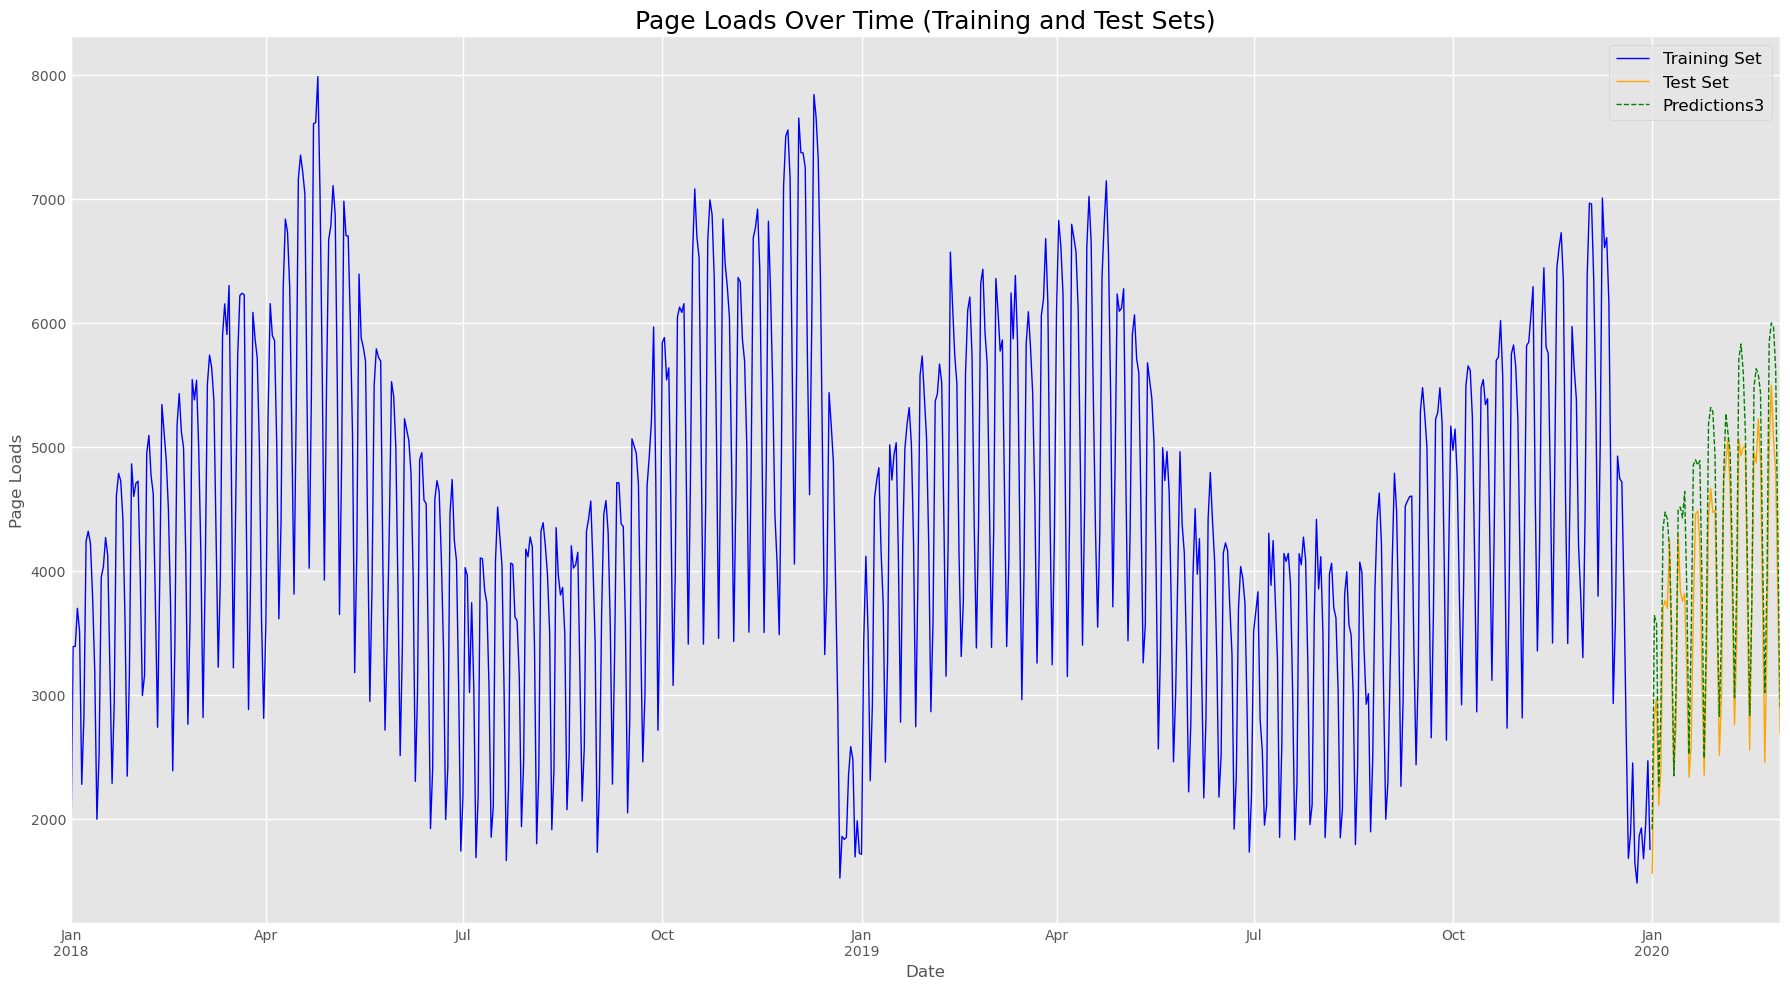

In [124]:
# Predict the future
predictions3 = reg3.predict(X_test3)

# Add predictions to the test set for plotting
test3['Predictions3'] = predictions3

# Create a new figure and axis object for the plot
fig, ax = plt.subplots(figsize=(18, 10))

# Plot 'Page Loads' over time for training and test sets
train3.plot(y='Page.Loads', ax=ax, color="blue", linestyle="-", linewidth=1, label='Training Set')
test3.plot(y='Page.Loads', ax=ax, color="orange", linestyle="-", linewidth=1, label='Test Set')
test3.plot(y='Predictions3', ax=ax, color="green", linestyle="--", linewidth=1, label='Predictions3')

# Set the title of the plot
ax.set_title("Page Loads Over Time (Training and Test Sets)", fontsize=18)

# Set the label for the x-axis
ax.set_xlabel("Date", fontsize=12)

# Set the label for the y-axis
ax.set_ylabel("Page Loads", fontsize=12)

# Add a legend to the plot
plt.legend(fontsize=12)

# Adjust the layout of the plot to prevent overlap of axis labels
fig.tight_layout()

# Display the plot
plt.show()

In [125]:
# Filter the DataFrame for the specified period
period_data3 = test3.loc[(test3.index >= split_date3) & (test3.index < test_end_date3)]

# Extract the actual values and predictions for the specified period
actual_values3 = period_data3[TARGET3]
predictions3 = period_data3['Predictions3']

# Calculate Mean Squared Error (MSE)
mse3 = mean_squared_error(actual_values3, predictions3)

# Calculate Mean Absolute Error (MAE)
mae3 = mean_absolute_error(actual_values3, predictions3)

# Calculate Mean Absolute Percentage Error (MAPE)
mape3 = np.mean(np.abs((actual_values3 - predictions3) / actual_values3)) * 100

# Print the results
print("Mean Squared Error (MSE):", np.sqrt(mse3))
print("Mean Absolute Error (MAE):", mae3)
print("Mean Absolute Percentage Error (MAPE):", mape3)

Mean Squared Error (MSE): 548.5175350304191
Mean Absolute Error (MAE): 480.9684326171875
Mean Absolute Percentage Error (MAPE): 13.113982010578793


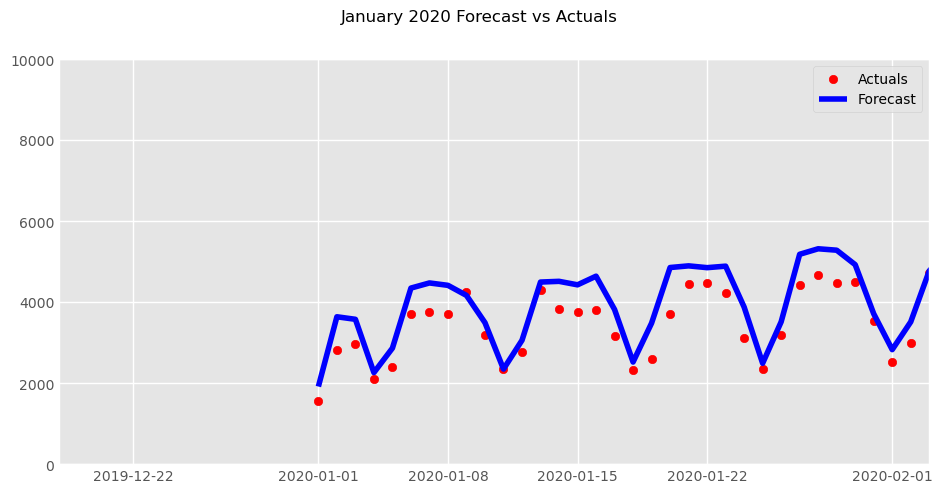

In [126]:
# Create a new figure and axis object for the plot
fig, ax = plt.subplots(figsize=(10, 5))

# Scatter plot of the actual values
ax.scatter(test3.index, test3['Page.Loads'], color='r', label='Actuals')

# Plot the forecast
ax.plot(test3.index, test3['Predictions3'], color='b', label='Forecast')

# Set x-axis limits for the specific month
ax.set_xlim(left=pd.Timestamp('2019-12-18'), right=pd.Timestamp('2020-02-03'))

# Set y-axis limits
ax.set_ylim(0, 10000)

# Set the title
plt.suptitle('January 2020 Forecast vs Actuals')

# Add a legend
plt.legend()

# Show the plot
plt.show()

# Forecasting with three year of data  


In [127]:
# Specify the split dates
split_date4 = '2020-01-01'
test_end_date4 = '2020-03-01'

# Split the data into training and test sets
train4 = df.loc[(df.index >= '2017-01-01') & (df.index < split_date4)].copy()
test4 = df.loc[(df.index >= split_date4) & (df.index < test_end_date4)].copy()

# Proceed with creating features
train4 = create_features(train4)
test4 = create_features(test4)

# Define features and target
FEATURES4 = ['dayofweek', 'quarter', 'month', 'dayofmonth']
TARGET4 = 'Page.Loads'

# Extract features and target variables
X_train4 = train4[FEATURES4]
y_train4 = train4[TARGET4]

X_test4 = test4[FEATURES4]
y_test4 = test4[TARGET4]

reg4 = xgb.XGBRegressor(
    n_estimators=1000,  # Number of boosting rounds
    early_stopping_rounds=50,  # Stop if no improvement in 50 rounds
    max_depth=5,  # Maximum depth of each tree
    learning_rate=0.1,  # Step size shrinkage
    objective='reg:squarederror'  # Regression task
)
reg4.fit(X_train4, y_train4,
         eval_set=[(X_train4, y_train4), (X_test4, y_test4)],
         verbose=100)


[0]	validation_0-rmse:1309.86151	validation_1-rmse:929.00135
[100]	validation_0-rmse:594.52762	validation_1-rmse:479.45093
[112]	validation_0-rmse:587.64114	validation_1-rmse:478.84085


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

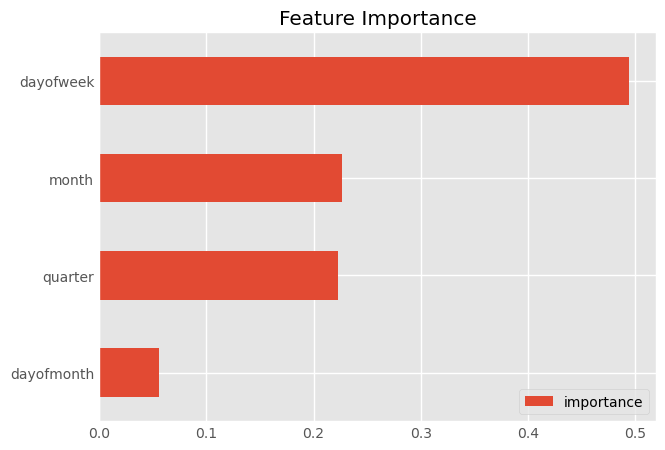

In [128]:
# Feature importance plot
fi4 = pd.DataFrame(data=reg4.feature_importances_,
                   index=reg4.feature_names_in_,
                   columns=['importance'])
fi4.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()


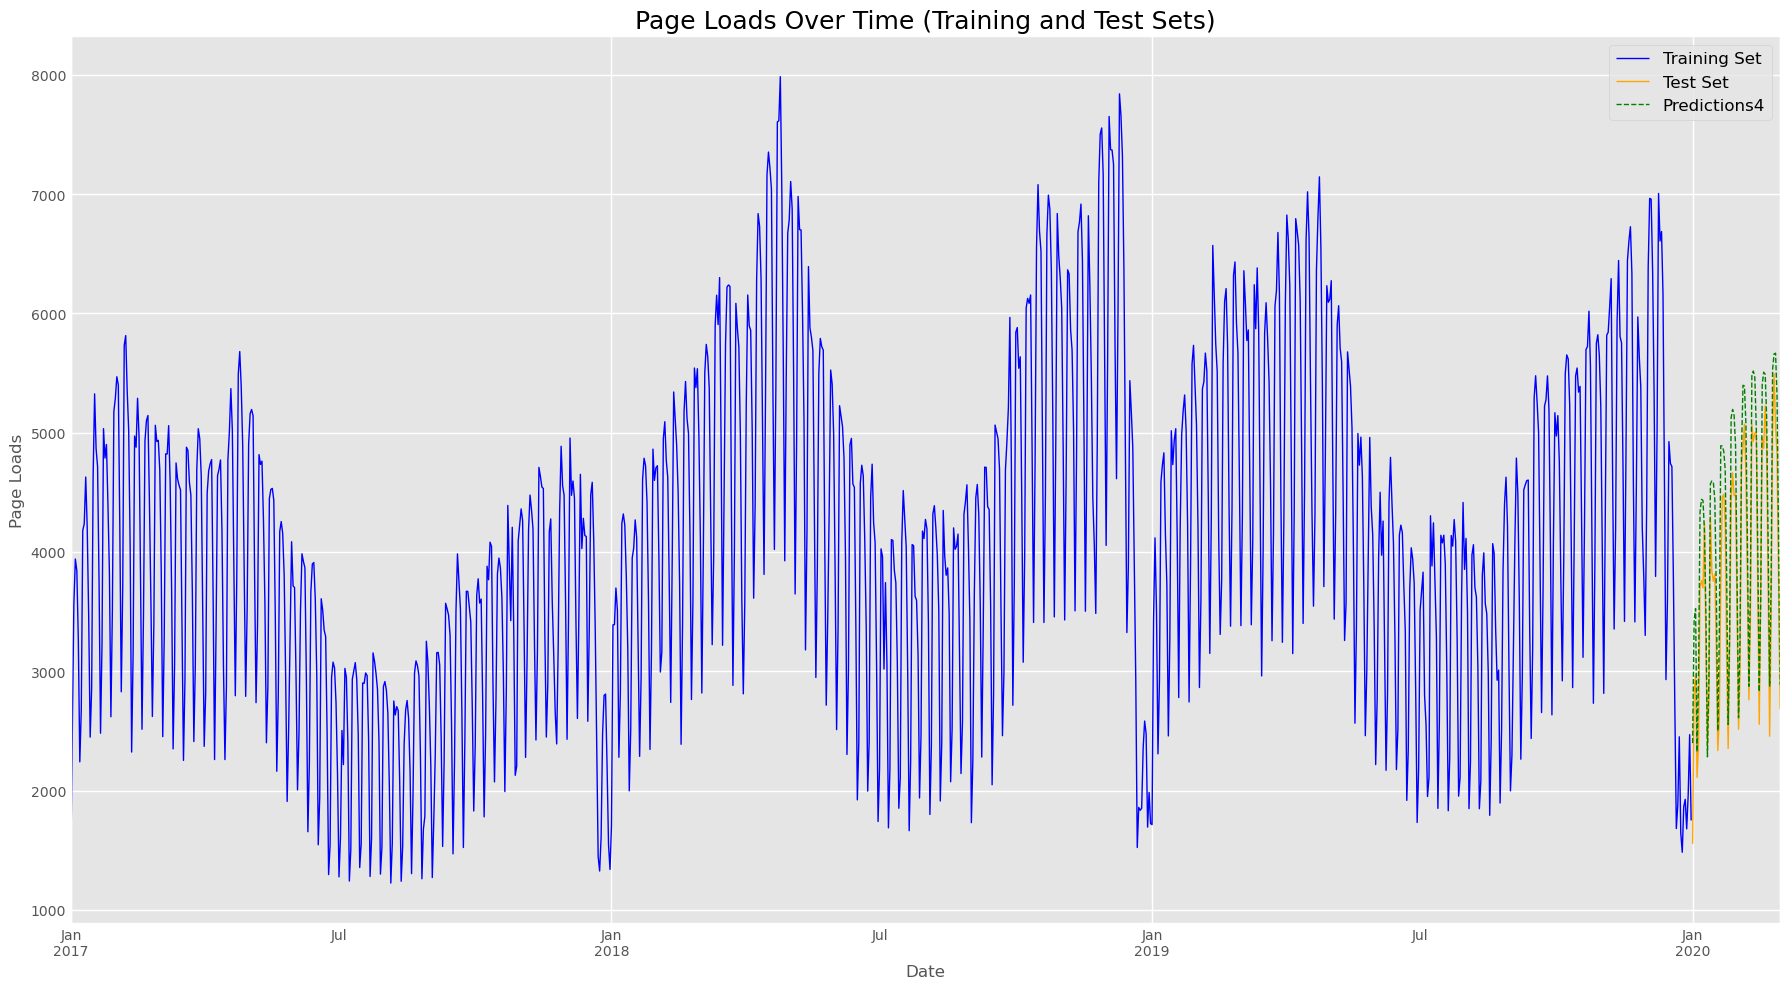

In [129]:
# Predict the future
predictions4 = reg4.predict(X_test4)

# Add predictions to the test set for plotting
test4['Predictions4'] = predictions4

# Create a new figure and axis object for the plot
fig, ax = plt.subplots(figsize=(18, 10))

# Plot 'Page Loads' over time for training and test sets
train4.plot(y='Page.Loads', ax=ax, color="blue", linestyle="-", linewidth=1, label='Training Set')
test4.plot(y='Page.Loads', ax=ax, color="orange", linestyle="-", linewidth=1, label='Test Set')
test4.plot(y='Predictions4', ax=ax, color="green", linestyle="--", linewidth=1, label='Predictions4')

# Set the title of the plot
ax.set_title("Page Loads Over Time (Training and Test Sets)", fontsize=18)

# Set the label for the x-axis
ax.set_xlabel("Date", fontsize=12)

# Set the label for the y-axis
ax.set_ylabel("Page Loads", fontsize=12)

# Add a legend to the plot
plt.legend(fontsize=12)

# Adjust the layout of the plot to prevent overlap of axis labels
fig.tight_layout()

# Display the plot
plt.show()

In [130]:
# Filter the DataFrame for the specified period
period_data4 = test4.loc[(test4.index >= split_date4) & (test4.index < test_end_date4)]

# Extract the actual values and predictions for the specified period
actual_values4 = period_data4[TARGET4]
predictions4 = period_data4['Predictions4']

# Calculate Mean Squared Error (MSE)
mse4 = mean_squared_error(actual_values4, predictions4)

# Calculate Mean Absolute Error (MAE)
mae4 = mean_absolute_error(actual_values4, predictions4)

# Calculate Mean Absolute Percentage Error (MAPE)
mape4 = np.mean(np.abs((actual_values4 - predictions4) / actual_values4)) * 100

# Print the results
print("Mean Squared Error (MSE):", np.sqrt(mse4))
print("Mean Absolute Error (MAE):", mae4)
print("Mean Absolute Percentage Error (MAPE):", mape4)

Mean Squared Error (MSE): 476.939420001863
Mean Absolute Error (MAE): 417.015771484375
Mean Absolute Percentage Error (MAPE): 11.78871804189745


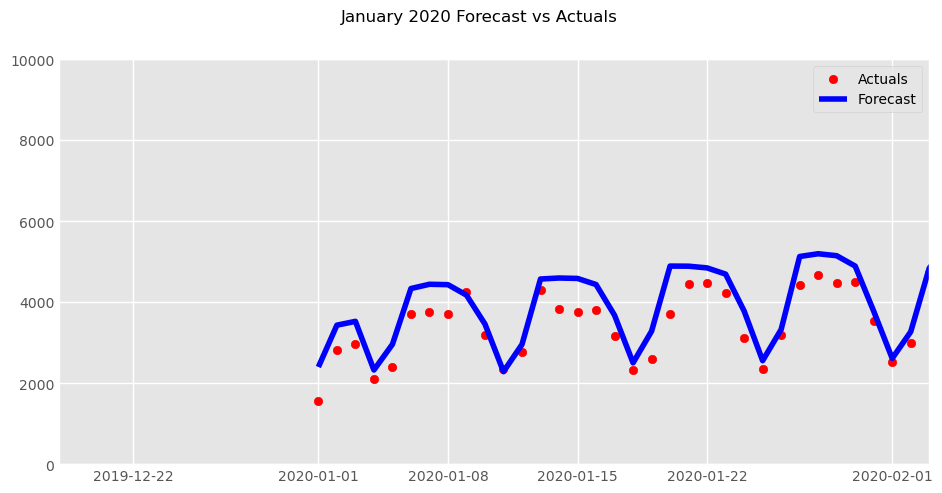

In [131]:
# Create a new figure and axis object for the plot
fig, ax = plt.subplots(figsize=(10, 5))

# Scatter plot of the actual values
ax.scatter(test4.index, test4['Page.Loads'], color='r', label='Actuals')

# Plot the forecast
ax.plot(test4.index, test4['Predictions4'], color='b', label='Forecast')

# Set x-axis limits for the specific month
ax.set_xlim(left=pd.Timestamp('2019-12-18'), right=pd.Timestamp('2020-02-03'))

# Set y-axis limits
ax.set_ylim(0, 10000)

# Set the title
plt.suptitle('January 2020 Forecast vs Actuals')

# Add a legend
plt.legend()

# Show the plot
plt.show()

# Forecasting with four year of data  


In [132]:
# Specify the split dates
split_date5 = '2020-01-01'
test_end_date5 = '2020-03-01'

# Split the data into training and test sets
train5 = df.loc[(df.index >= '2016-01-01') & (df.index < split_date5)].copy()
test5 = df.loc[(df.index >= split_date5) & (df.index < test_end_date5)].copy()

# Proceed with creating features
train5 = create_features(train5)
test5 = create_features(test5)

# Define features and target
FEATURES5 = ['dayofweek', 'quarter', 'month', 'dayofmonth']
TARGET5 = 'Page.Loads'

# Extract features and target variables
X_train5 = train5[FEATURES5]
y_train5 = train5[TARGET5]

X_test5 = test5[FEATURES5]
y_test5 = test5[TARGET5]

reg5 = xgb.XGBRegressor(
    n_estimators=1000,  # Number of boosting rounds
    early_stopping_rounds=50,  # Stop if no improvement in 50 rounds
    max_depth=5,  # Maximum depth of each tree
    learning_rate=0.1,  # Step size shrinkage
    objective='reg:squarederror'  # Regression task
)
reg5.fit(X_train5, y_train5,
         eval_set=[(X_train5, y_train5), (X_test5, y_test5)],
         verbose=100)

[0]	validation_0-rmse:1312.04363	validation_1-rmse:952.14176
[100]	validation_0-rmse:581.66413	validation_1-rmse:408.23590
[200]	validation_0-rmse:543.28599	validation_1-rmse:388.95209
[290]	validation_0-rmse:517.03489	validation_1-rmse:383.16609


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

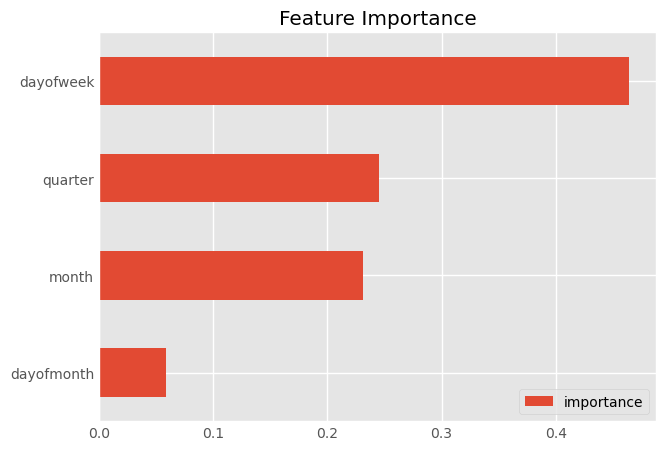

In [133]:
# Feature importance plot
fi5 = pd.DataFrame(data=reg5.feature_importances_,
                   index=reg5.feature_names_in_,
                   columns=['importance'])
fi5.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

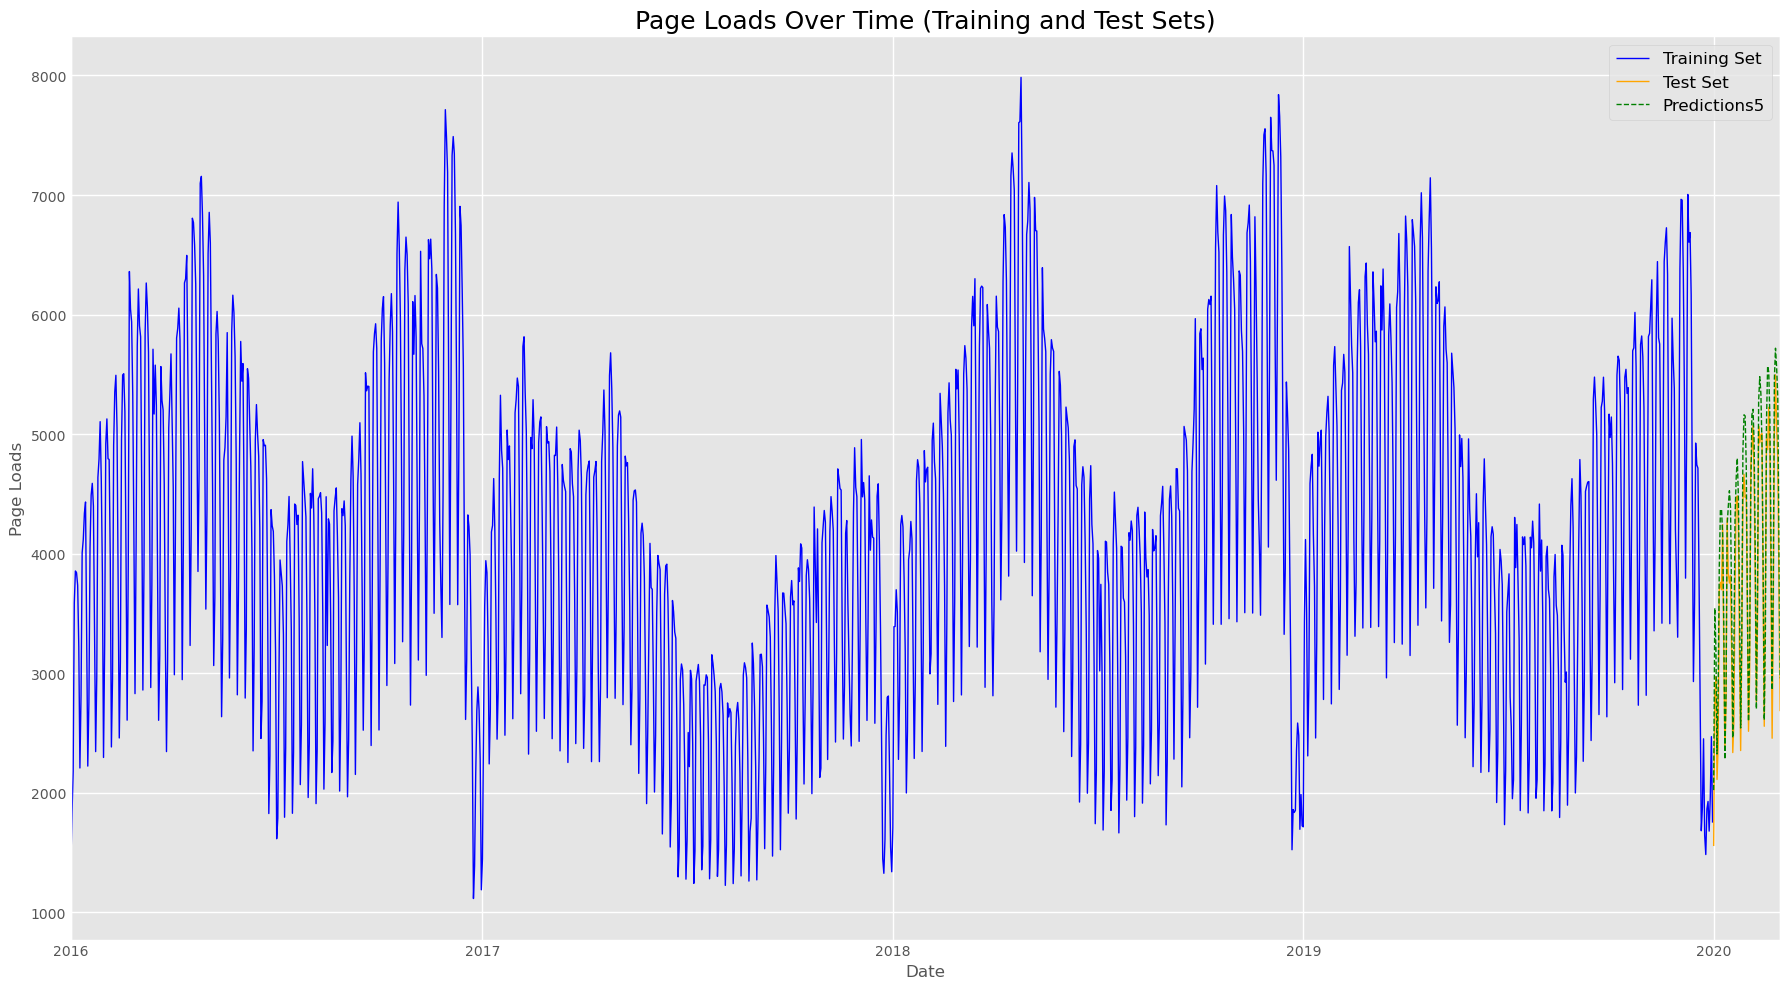

In [134]:
# Predict the future
predictions5 = reg5.predict(X_test5)

# Add predictions to the test set for plotting
test5['Predictions5'] = predictions5

# Create a new figure and axis object for the plot
fig, ax = plt.subplots(figsize=(18, 10))

# Plot 'Page Loads' over time for training and test sets
train5.plot(y='Page.Loads', ax=ax, color="blue", linestyle="-", linewidth=1, label='Training Set')
test5.plot(y='Page.Loads', ax=ax, color="orange", linestyle="-", linewidth=1, label='Test Set')
test5.plot(y='Predictions5', ax=ax, color="green", linestyle="--", linewidth=1, label='Predictions5')

# Set the title of the plot
ax.set_title("Page Loads Over Time (Training and Test Sets)", fontsize=18)

# Set the label for the x-axis
ax.set_xlabel("Date", fontsize=12)

# Set the label for the y-axis
ax.set_ylabel("Page Loads", fontsize=12)

# Add a legend to the plot
plt.legend(fontsize=12)

# Adjust the layout of the plot to prevent overlap of axis labels
fig.tight_layout()

# Display the plot
plt.show()

In [135]:
# Filter the DataFrame for the specified period
period_data5 = test5.loc[(test5.index >= split_date5) & (test5.index < test_end_date5)]

# Extract the actual values and predictions for the specified period
actual_values5 = period_data5[TARGET5]
predictions5 = period_data5['Predictions5']

# Calculate Mean Squared Error (MSE)
mse5 = mean_squared_error(actual_values5, predictions5)

# Calculate Mean Absolute Error (MAE)
mae5 = mean_absolute_error(actual_values5, predictions5)

# Calculate Mean Absolute Percentage Error (MAPE)
mape5 = np.mean(np.abs((actual_values5 - predictions5) / actual_values5)) * 100

# Print the results
print("Mean Squared Error (MSE):", np.sqrt(mse5))
print("Mean Absolute Error (MAE):", mae5)
print("Mean Absolute Percentage Error (MAPE):", mape5)

Mean Squared Error (MSE): 380.07737148861423
Mean Absolute Error (MAE): 326.73960367838544
Mean Absolute Percentage Error (MAPE): 9.13505070466666


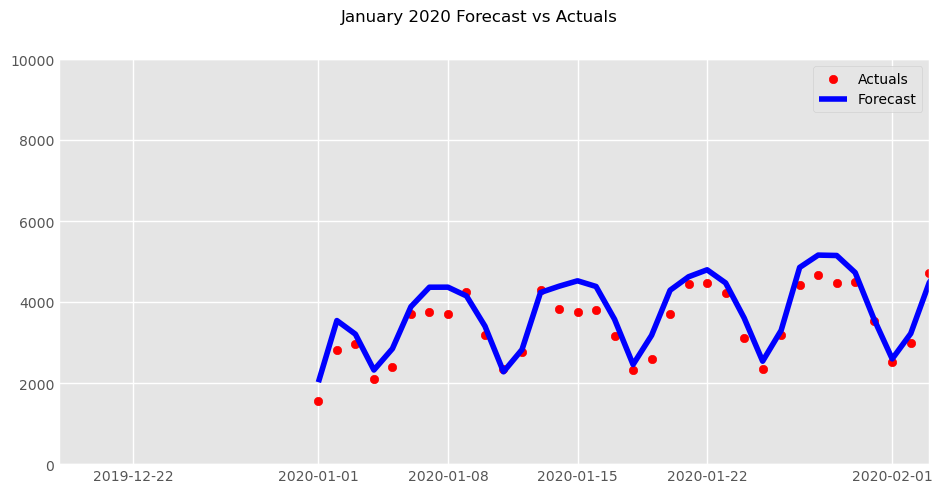

In [136]:

# Create a new figure and axis object for the plot
fig, ax = plt.subplots(figsize=(10, 5))

# Scatter plot of the actual values
ax.scatter(test5.index, test5['Page.Loads'], color='r', label='Actuals')

# Plot the forecast
ax.plot(test5.index, test5['Predictions5'], color='b', label='Forecast')

# Set x-axis limits for the specific month
ax.set_xlim(left=pd.Timestamp('2019-12-18'), right=pd.Timestamp('2020-02-03'))

# Set y-axis limits
ax.set_ylim(0, 10000)

# Set the title
plt.suptitle('January 2020 Forecast vs Actuals')

# Add a legend
plt.legend()

# Show the plot
plt.show()